In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('modified_diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0


In [2]:
data = data[data['gender'].isin(['Male', 'Female'])]
data = data[data['age'] >= 0]

data.drop_duplicates(inplace=True)

age_mean = data[data['age'] != 0]['age'].mean()
data['age'].fillna(age_mean, inplace=True)

data['age'] = data['age'].astype(int)

data = data[(data['bmi'] >= 10) & (data['bmi'] <= 60)]

HbA1c_level_mean = data[data['HbA1c_level'] != 0]['HbA1c_level'].mean()
data['HbA1c_level'].fillna(HbA1c_level_mean, inplace=True)

data = data[data['blood_glucose_level'] != 9999]

data.replace({"smoking_history": {"yes": "current"}}, inplace=True)

ordinal_mapping = {'never': 0, 'former': 0.25, 'not current': 0.5, 'ever': 0.75, 'current': 1}

data['smoking_history'] = data['smoking_history'].map(ordinal_mapping)

smoking_history_mode_value = data['smoking_history'].mode()[0]
data['smoking_history'].fillna(smoking_history_mode_value, inplace=True)

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3,Female,37,0,0,1.0,25.262602,5.529698,155,0
4,Male,75,1,1,1.0,23.212811,4.800000,155,0
5,Female,16,0,0,0.0,28.156373,6.600000,85,0
6,Female,46,0,0,0.0,16.546449,6.500000,200,1
7,Female,82,0,0,0.0,25.621355,5.700000,85,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# ویژگی‌ها و هدف را جدا کنید
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data['diabetes']

# داده‌ها را به مجموعه‌های آموزشی و تست تقسیم کنید
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# مدل SVM را آموزش دهید
svm_model = SVC()
svm_model.fit(X_train, y_train)

# پیش‌بینی‌ها با مدل SVM
svm_predictions = svm_model.predict(X_test)

# مدل KNN را آموزش دهید
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# پیش‌بینی‌ها با مدل KNN
knn_predictions = knn_model.predict(X_test)

# محاسبه معیارهای مورد نظر برای مدل SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print('SVM Accuracy:', svm_accuracy)
print('SVM Precision:', svm_precision)
print('SVM Recall:', svm_recall)
print('SVM F1 Score:', svm_f1)
print('SVM Confusion Matrix:\n', svm_conf_matrix)

# محاسبه معیارهای مورد نظر برای مدل KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

print('KNN Accuracy:', knn_accuracy)
print('KNN Precision:', knn_precision)
print('KNN Recall:', knn_recall)
print('KNN F1 Score:', knn_f1)
print('KNN Confusion Matrix:\n', knn_conf_matrix)


C:\Users\AAA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


SVM Accuracy: 0.9647206485973066
SVM Precision: 0.9791530944625407
SVM Recall: 0.5985663082437276
SVM F1 Score: 0.7429560059317843
SVM Confusion Matrix:
 [[26936    32]
 [ 1008  1503]]
KNN Accuracy: 0.9650937955832966
KNN Precision: 0.9080396475770925
KNN Recall: 0.656710473914775
KNN F1 Score: 0.7621908943840998
KNN Confusion Matrix:
 [[26801   167]
 [  862  1649]]


       gender  age  hypertension  heart_disease  smoking_history        bmi  \
47383       1   30             0              0              1.0  41.838603   
31225       1   51             0              0              1.0  20.031397   
39375       0   37             0              0              0.0  31.030051   
61129       0   76             0              0              0.5  22.008207   
27455       1   65             0              0              0.0  30.125362   

       HbA1c_level  blood_glucose_level  diabetes  
47383          5.7                  130         0  
31225          4.8                  130         0  
39375          4.0                  160         0  
61129          6.6                   90         0  
27455          8.2                  140         1  


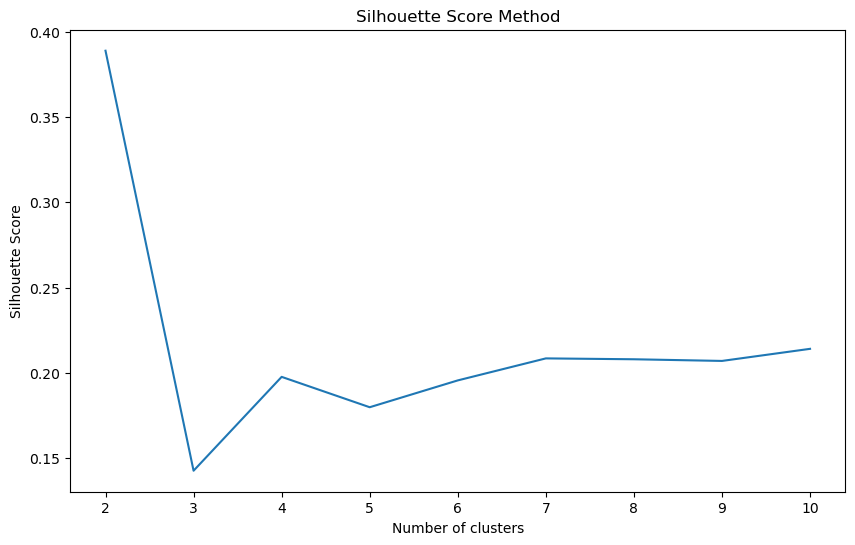

The best number of clusters is: 2
       gender  age  hypertension  heart_disease  smoking_history        bmi  \
47383       1   30             0              0              1.0  41.838603   
31225       1   51             0              0              1.0  20.031397   
39375       0   37             0              0              0.0  31.030051   
61129       0   76             0              0              0.5  22.008207   
27455       1   65             0              0              0.0  30.125362   

       HbA1c_level  blood_glucose_level  diabetes  Cluster_KMeans  
47383          5.7                  130         0               1  
31225          4.8                  130         0               1  
39375          4.0                  160         0               1  
61129          6.6                   90         0               1  
27455          8.2                  140         1               0  

Cluster 0 Correlation Matrix:


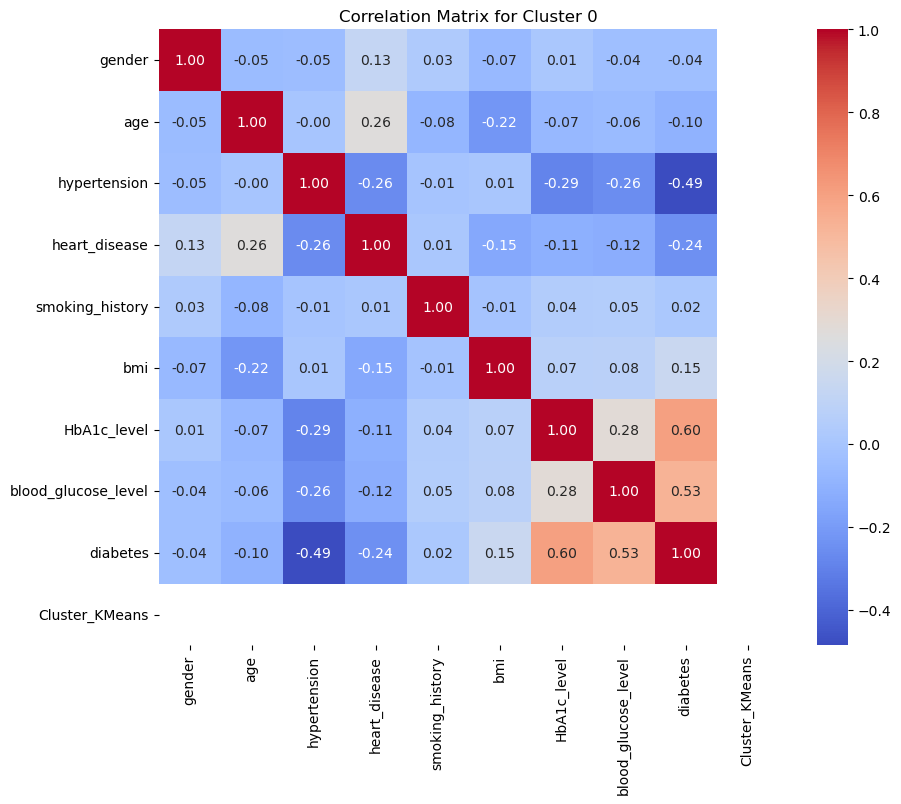


Cluster 1 Correlation Matrix:


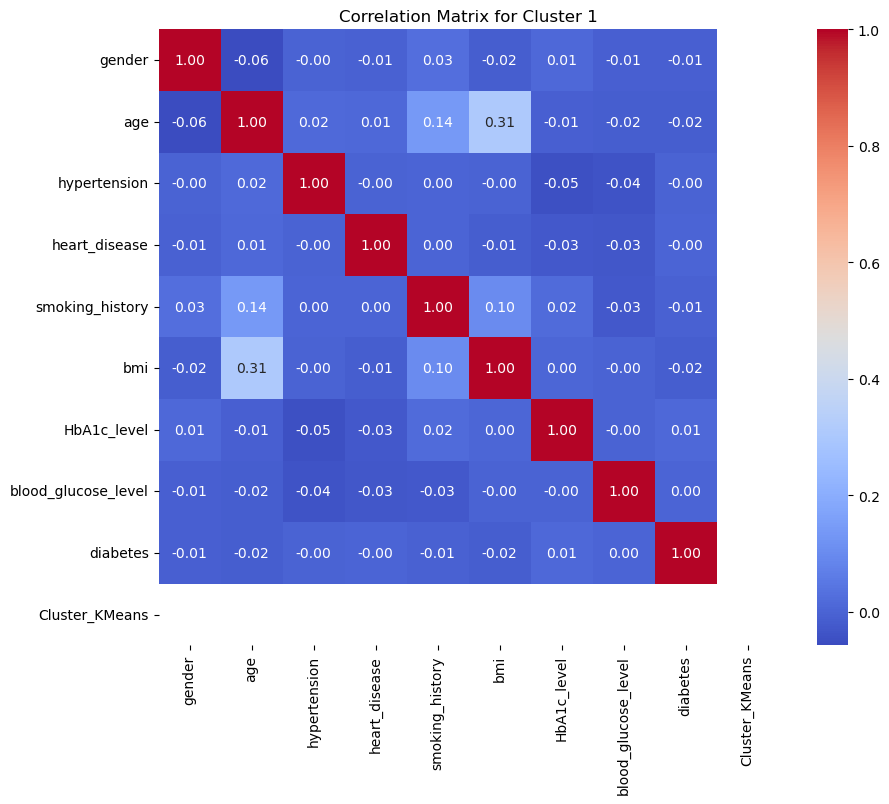

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


sample_data = data.sample(frac=0.1, random_state=42)


# نمایش برخی از داده‌ها
print(sample_data.head())

# داده‌های ویژگی را به صورت استاندارد درمی‌آوریم
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
X = sample_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تعیین تعداد خوشه‌ها با استفاده از امتیاز سیلوئت
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# انتخاب بهترین تعداد خوشه‌ها بر اساس امتیاز سیلوئت
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best number of clusters is: {best_n_clusters}')

# اجرای K-Means با بهترین تعداد خوشه‌ها
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', random_state=42)
sample_data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# نمایش برخی از داده‌ها با خوشه‌بندی
print(sample_data.head())


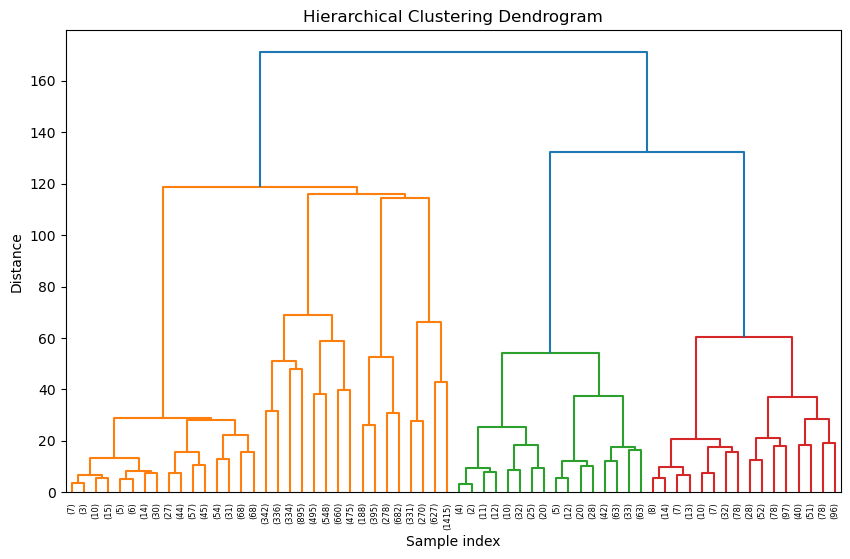


Hierarchical Clustering:

Cluster 1:
blood_glucose_level    133.039977
age                     39.751571
bmi                     26.962216
HbA1c_level              5.398230
gender                   0.397601
smoking_history          0.170560
hypertension             0.055283
heart_disease            0.000000
diabetes                 0.000000
Name: 1, dtype: float64

Cluster 2:
blood_glucose_level    178.097106
age                     62.058824
bmi                     30.871235
HbA1c_level              6.597666
diabetes                 0.751634
gender                   0.487395
heart_disease            0.356676
hypertension             0.245565
smoking_history          0.238562
Name: 2, dtype: float64
       gender  age  hypertension  heart_disease  smoking_history        bmi  \
47383       1   30             0              0              1.0  41.838603   
31225       1   51             0              0              1.0  20.031397   
39375       0   37             0              0      

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns

# محاسبه ماتریس پیوند برای خوشه‌بندی سلسله‌مراتبی
Z = linkage(X_scaled, method='ward')

# رسم دندروگرام
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

best_n_clusters_hierarchical = best_n_clusters
sample_data['Cluster_Hierarchical'] = fcluster(Z, best_n_clusters_hierarchical, criterion='maxclust')


data_mean_hierarchical = sample_data[features + ['Cluster_Hierarchical']].groupby('Cluster_Hierarchical').mean()

# چاپ ویژگی‌های برجسته هر خوشه برای Hierarchical Clustering
print("\nHierarchical Clustering:")
for cluster in range(1, best_n_clusters_hierarchical + 1):
    print(f"\nCluster {cluster}:")
    print(data_mean_hierarchical.loc[cluster].sort_values(ascending=False))
    
# نمایش برخی از داده‌ها با خوشه‌بندی سلسله‌مراتبی
print(sample_data.head())


In [6]:
# انتخاب ویژگی‌های برجسته برای تحلیل
selected_features = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# تحلیل ویژگی‌های برجسته در هر خوشه (K-Means)
cluster_centers_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=features)[selected_features]
data_mean_kmeans = sample_data[selected_features + ['Cluster_KMeans']].groupby('Cluster_KMeans').mean()

# تحلیل ویژگی‌های برجسته در هر خوشه (Hierarchical)
data_mean_hierarchical = sample_data[selected_features + ['Cluster_Hierarchical']].groupby('Cluster_Hierarchical').mean()

# چاپ ویژگی‌های برجسته هر خوشه برای K-Means
print("\nK-Means Clustering:")
for cluster in range(best_n_clusters):
    print(f"\nCluster {cluster}:")
    print(data_mean_kmeans.loc[cluster].sort_values(ascending=False))

# چاپ ویژگی‌های برجسته هر خوشه برای Hierarchical Clustering
print("\nHierarchical Clustering:")
for cluster in range(1, best_n_clusters_hierarchical + 1):
    print(f"\nCluster {cluster}:")
    print(data_mean_hierarchical.loc[cluster].sort_values(ascending=False))



K-Means Clustering:

Cluster 0:
blood_glucose_level    164.496436
age                     61.534673
bmi                     30.686251
HbA1c_level              6.230201
hypertension             0.478937
heart_disease            0.244977
smoking_history          0.232988
Name: 0, dtype: float64

Cluster 1:
blood_glucose_level    133.006036
age                     38.578051
bmi                     26.773924
HbA1c_level              5.398334
smoking_history          0.167723
hypertension             0.000966
heart_disease            0.000483
Name: 1, dtype: float64

Hierarchical Clustering:

Cluster 1:
blood_glucose_level    133.039977
age                     39.751571
bmi                     26.962216
HbA1c_level              5.398230
smoking_history          0.170560
hypertension             0.055283
heart_disease            0.000000
Name: 1, dtype: float64

Cluster 2:
blood_glucose_level    178.097106
age                     62.058824
bmi                     30.871235
HbA1c_level      